### 基于贝叶斯决策理论的分类方法

朴素贝叶斯的优缺点：

- 优点：在数据较少的情况下仍然有效，可以处理多类别问题。
- 缺点：对于输入数据的准备方式较为敏感。
- 适用数据类型：标称型数据。

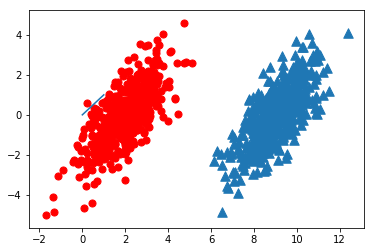

In [1]:
%run create2Normal.py

对于上图，我们用p1(x,y)来表示数据点(x,y)属于类别1(红色圆点)的概率，用p2(x,y)来表示数据点(x,y)属于类别2(蓝色三角)的概率。  
对于一个新的数据点(x,y)，可以用下面的规则来判断它的类别：  

- 如果p1(x,y) > p2(x,y)，那么类别为1
- 如果p2(x,y) > p1(x,y)，那么类别为2

即我们会选择高概率对应的类别。这就是**贝叶斯决策理论的核心思想** ，即**选择具有最高概率的决策** 。

### 条件概率

一种有效计算条件概率的方法称为贝叶斯准则。贝叶斯准则告诉我们如何交换条件概率中的条件和结果，即如果已知P(x|c),要求P(c|x),则可以用如下的条件概率计算公式：
$$p(c|x) = \frac{p(x|c) \cdot p(c)}{p(x)}$$


### 使用条件概率来分类

使用贝叶斯准则在进行类似第一节中的比较时，需要计算和比较$p(c_{1}|x,y)$和$p(c_{2}|x,y)$。应用贝叶斯准则可以得到：
$$p(c_{i}|x,\mathbf y) = \frac{p(x,\mathbf y| c_{i}) \cdot p(c_{i})}{p(x,\mathbf y)}$$

使用这些定义可以定义贝叶斯分类准则为：

- 如果$P(c_{1}|x,y) > P(c_{2}|x,y)$，那么属于类别$c_{1}$。
- 如果$P(c_{1}|x,y) < P(c_{2}|x,y)$，那么属于类别$c_{2}$。

### 使用朴素贝叶斯进行文档分类

朴素贝叶斯的一般过程

(1)收集数据：可以使用任何方法。本章使用RSS源。  
(2)准备数据：需要数值型或者布尔型数据。  
(3)分析数据：有大量特征时，绘制特征作用不大，此时使用直方图效果最好。  
(4)训练算法：计算不同的独立特征的条件概率。  
(5)测试算法：计算错误率。  
(6)使用算法：一个常见的朴素贝叶斯应用是文档分类。可以在任意的分类场景中使用朴素贝叶斯分类器，不一定非要是文本。

根据统计学知识，如果每个特征需要N个样本，对于10个特征就要有$N^{10}$个样本，对于包含1000个特征(1000个单词作为特征)的词汇表则需要$N^{1000}$个样本。**如果特征之间相互独立，就可以把样本数从$N^{1000}$压缩到$1000 \times N$** 。

这里的独立是统计意义上的独立，即**一个特征或者单词出现的可能性与它和其他单词相邻没有关系** 。

朴素贝叶斯分类器的另一个假设是**每个特征同等重要** 。朴素贝叶斯分类器通常有两种实现方式：一种基于贝努利模型实现，另一种基于多项式模型实现。这里采用前一种实现方式。该实现方式中并**不考虑词在文档中出现的次数**，只考虑出不出现，因此在这个意义上相当于假设词是等权重的。后面**考虑词在文档中出现次数**的模型是**多项式模型**。

### 使用Python进行文本分类

In [2]:
import bayes

In [3]:
listOPosts, listClasses = bayes.loadDataSet()

In [4]:
myVocabList = bayes.createVocabList(listOPosts)

In [5]:
print myVocabList

['cute', 'love', 'help', 'garbage', 'quit', 'I', 'problems', 'is', 'park', 'stop', 'flea', 'dalmation', 'licks', 'food', 'not', 'him', 'buying', 'posting', 'has', 'worthless', 'ate', 'to', 'maybe', 'please', 'dog', 'how', 'stupid', 'so', 'take', 'mr', 'steak', 'my']


In [6]:
print bayes.setOfWords2Vec(myVocabList, listOPosts[0])

[0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1]


In [7]:
print bayes.setOfWords2Vec(myVocabList, listOPosts[3])

[0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]


重写贝叶斯准则，将x，y替换为$\mathbf w$,$\mathbf w$表示一个向量。
$$p(c_{i}|\mathbf w) = \frac{p(\mathbf w|c_{i}) \cdot p(c_{i})}{p(\mathbf w)}$$

我们可以先通过类别i(侮辱性语言或者非侮辱性语言)中文档数除以总文档数来计算概率$p(c_{i})$。接下来计算$p(\mathbf w | c_{i})$，这里会用到朴素贝叶斯假设。如果将$\mathbf w$展开为一个个独立特征，则可以将上述概率写成$p(w_{0}, w_{1},w_{2}, \cdot \cdot \cdot , w_{n}|c_{i})$。这里假设所有词都相互独立，该假设也称为**条件独立性假设** ，它意味着可以使用$p(w_{0}|c_{i})p(w_{1}|c_{i})p(w_{2}|c_{i})\cdot \cdot \cdot p(w_{N}|c_{i})$来计算上述概率。

函数伪代码如下：

    计算每个类别中的文档数目
    对每篇训练文档：
        对每个类别：
            如果词条出现在文档中->增加该词条的计数值
            增加所有词条的计数值
        对每个类别：
            对每个词条：
                将该词条的数目除以总词条数目得到条件概率
        返回每个类别的条件概率

In [10]:
import numpy as np

In [11]:
reload(bayes)

<module 'bayes' from 'bayes.py'>

In [12]:
listOPosts, listClasses = bayes.loadDataSet()

In [13]:
myVocabList = bayes.createVocabList(listOPosts)

In [15]:
trainMat = []

In [16]:
for postinDoc in listOPosts:
    trainMat.append(bayes.setOfWords2Vec(myVocabList, postinDoc))

In [21]:
p0V, p1V, pAb = bayes.trainNB0_Old(trainMat, listClasses)

In [22]:
pAb

0.5

In [23]:
p0V

array([ 0.04166667,  0.04166667,  0.04166667,  0.        ,  0.        ,
        0.04166667,  0.04166667,  0.04166667,  0.        ,  0.04166667,
        0.04166667,  0.04166667,  0.04166667,  0.        ,  0.        ,
        0.08333333,  0.        ,  0.        ,  0.04166667,  0.        ,
        0.04166667,  0.04166667,  0.        ,  0.04166667,  0.04166667,
        0.04166667,  0.        ,  0.04166667,  0.        ,  0.04166667,
        0.04166667,  0.125     ])

In [24]:
p1V

array([ 0.        ,  0.        ,  0.        ,  0.05263158,  0.05263158,
        0.        ,  0.        ,  0.        ,  0.05263158,  0.05263158,
        0.        ,  0.        ,  0.        ,  0.05263158,  0.05263158,
        0.05263158,  0.05263158,  0.05263158,  0.        ,  0.10526316,
        0.        ,  0.05263158,  0.05263158,  0.        ,  0.10526316,
        0.        ,  0.15789474,  0.        ,  0.05263158,  0.        ,
        0.        ,  0.        ])

在编写trainNB0函数的朴素贝叶斯算法时，需要计算$p(w_{0}|1)p(w_{1}|1)p(w_{2}|1)$。如果一个概率为0，则最后乘积也为0。为了降低这种影响，可以将所有词的出现数初始化为1，并将分母初始化为2。

另一个问题是下溢出，由于太多很小的数相乘造成。一般解决办法是取对数，将乘法变为加法，从而避免下溢出的错误。

In [25]:
reload(bayes)

<module 'bayes' from 'bayes.py'>

In [26]:
bayes.testingNB()

['love', 'my', 'dalmation'] classified as:  0
['stupid', 'garbage'] classified as:  1


目前我们将每个词出现与否作为一个特征，这可以被描述为**词集模型(set-of-words model)** 。如果一个词在文档中出现不止一次，这可能意味着包含该词是否出现在文档中所不能表达的某种信息，这种方法称为**词袋模型(bag-of-words model)** 。

词袋模型中每个单词可以出现多次，而词集中，每个单词只能出现一次。

### 使用朴素贝叶斯过滤垃圾邮件

使用朴素贝叶斯对电子邮件进行分类

(1)收集数据：提供文本文件。  
(2)准备数据：将文本文件解析成词条向量。  
(3)分析数据：检查词条确保解析的正确性。  
(4)训练算法：使用我们之前建立的trainNB0()函数。  
(5)测试算法：使用classifyNB()，并且构建一个新的测试函数来计算文档集的错误率。  
(6)使用算法：构建一个完整的程序对一组文档进行分类，将错分的文档输出到屏幕上。  

In [27]:
mySent = 'This book is the best book on Python or M.L. I have ever laid eyes upon.'

In [28]:
mySent.split()

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M.L.',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon.']

In [29]:
import re

In [30]:
regEx = re.compile('\\W*')

In [31]:
listOfTokens = regEx.split(mySent)

In [32]:
listOfTokens

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M',
 'L',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon',
 '']

In [33]:
[tok for tok in listOfTokens if len(tok) > 0]

['This',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'Python',
 'or',
 'M',
 'L',
 'I',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon']

In [34]:
[tok.lower() for tok in listOfTokens if len(tok) > 0]

['this',
 'book',
 'is',
 'the',
 'best',
 'book',
 'on',
 'python',
 'or',
 'm',
 'l',
 'i',
 'have',
 'ever',
 'laid',
 'eyes',
 'upon']

In [35]:
emailText = open('email/ham/6.txt', 'r').read()

In [36]:
listOfTokens = regEx.split(emailText)

在spamTest函数中的随机构造训练集的部分，随机选择数据的一部分作为训练集，剩余部分作为测试集的过程称为**留存交叉验证(hold-out cross validation)** 。假定现在只完成了一次迭代，那么为了更精确地估计分类器的错误率，就应该进行多次迭代后求出平均错误。

In [45]:
reload(bayes)

<module 'bayes' from 'bayes.py'>

In [46]:
bayes.spamTest()

the error rate is:  0.1


In [47]:
bayes.spamTest()

the error rate is:  0.0
